In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv('../train.csv')
test_df = pd.read_csv('../test.csv')

Basic information

In [2]:
print(train_df.info())

print("\nTarget Class Distribution:")
print(train_df['price_class'].value_counts(normalize=True))

<class 'pandas.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  str    
 1   room_type            40737 non-null  str    
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), str(2)
memory usage: 2.2 MB
None

Target Class Distribution:
price_class
1    0.563195
2    0.238077
0    0.134638
3    0.064090
Name: proportion, dtype: float64


Analyzing shape

In [3]:
print("Train Shape:", train_df.shape)
train_df.info()

Train Shape: (41348, 7)
<class 'pandas.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  str    
 1   room_type            40737 non-null  str    
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), str(2)
memory usage: 2.2 MB


Checking for null values

/tmp/ipykernel_90976/1702870684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='magma')


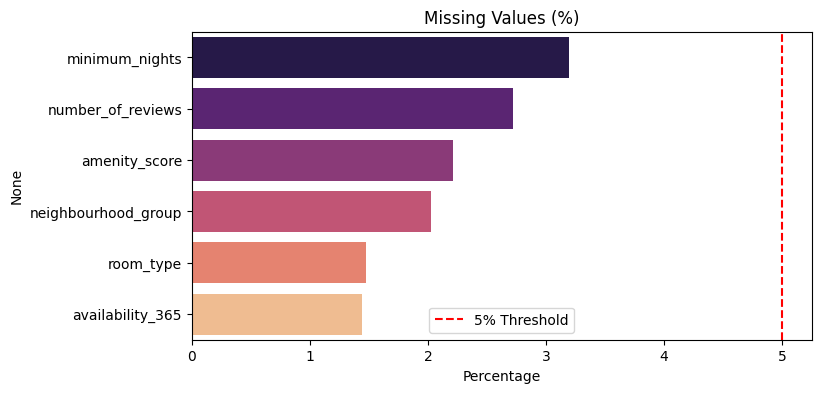

In [ ]:
missing = (train_df.isnull().sum() / len(train_df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=missing.values, y=missing.index, palette='magma')
plt.title('Missing Values (%)')
plt.xlabel('Percentage')
plt.axvline(x=5, color='r', linestyle='--', label='5% Threshold') # Visual guide
plt.legend()
plt.show()

Imputation

In [ ]:
for col in ['room_type', 'neighbourhood_group']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

for col in ['amenity_score', 'availability_365', 'minimum_nights', 'number_of_reviews']:
    train_df[col] = train_df[col].fillna(train_df[col].median())

Univariate Analysis

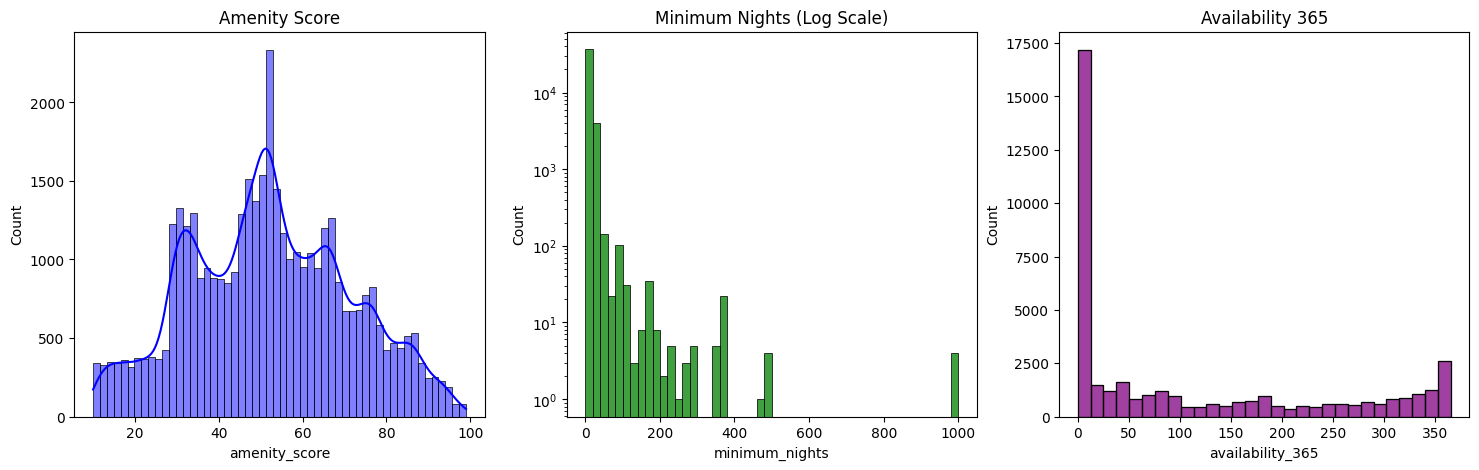

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(train_df['amenity_score'], kde=True, color='blue', ax=ax[0])
ax[0].set_title('Amenity Score')

sns.histplot(train_df['minimum_nights'], bins=50, color='green', ax=ax[1])
ax[1].set_yscale('log') 
ax[1].set_title('Minimum Nights (Log Scale)')

sns.histplot(train_df['availability_365'], color='purple', ax=ax[2])
ax[2].set_title('Availability 365')

plt.show()

Bivariate Analysis

/tmp/ipykernel_90976/455191455.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_class', y='amenity_score', data=train_df, ax=ax[1], palette='coolwarm')


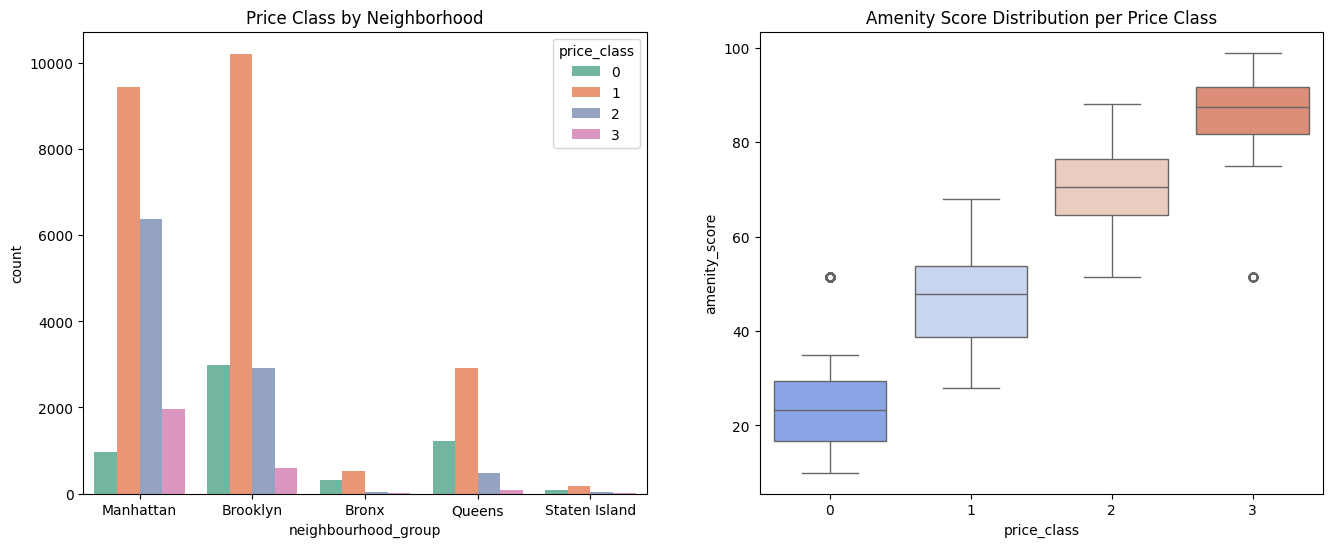

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='neighbourhood_group', hue='price_class', data=train_df, ax=ax[0], palette='Set2')
ax[0].set_title('Price Class by Neighborhood')

sns.boxplot(x='price_class', y='amenity_score', data=train_df, ax=ax[1], palette='coolwarm')
ax[1].set_title('Amenity Score Distribution per Price Class')

plt.show()

Correlation matrix

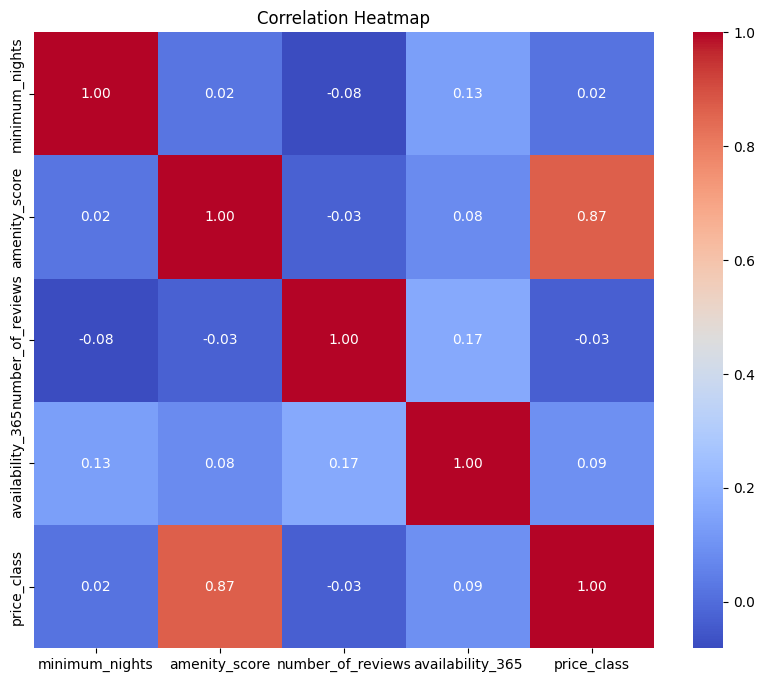

In [8]:
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [9]:

df = pd.read_csv('../train.csv')
for col in ['room_type', 'neighbourhood_group']:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in ['amenity_score', 'availability_365', 'minimum_nights', 'number_of_reviews']:
    df[col] = df[col].fillna(df[col].median())

missing = (pd.read_csv('../train.csv').isnull().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=missing.values, y=missing.index, palette='magma')
plt.title('Percentage of Missing Values')
plt.savefig('../plots/missing_values_plot.png', bbox_inches='tight', dpi=300)
plt.close()

plt.figure(figsize=(8, 5))
sns.countplot(x='price_class', data=df, palette='viridis')
plt.title('Distribution of Price Classes')
plt.savefig('../plots/target_distribution.png', bbox_inches='tight', dpi=300)
plt.close()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['amenity_score'], kde=True, color='blue', ax=ax[0])
ax[0].set_title('Amenity Score Distribution')
sns.histplot(df['minimum_nights'], bins=50, color='green', ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_title('Minimum Nights (Log Scale)')
plt.savefig('../plots/univariate_plots.png', bbox_inches='tight', dpi=300)
plt.close()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='neighbourhood_group', hue='price_class', data=df, ax=ax[0])
ax[0].set_title('Price Class by Neighborhood')
sns.boxplot(x='price_class', y='amenity_score', data=df, ax=ax[1])
ax[1].set_title('Amenity Score vs Price Class')
plt.savefig('../plots/bivariate_plots.png', bbox_inches='tight', dpi=300)
plt.close()

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.savefig('../plots/correlation_matrix.png', bbox_inches='tight', dpi=300)
plt.close()

print("All 5 plots have been saved successfully to your folder!")

/tmp/ipykernel_90976/4066987255.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='magma')
/tmp/ipykernel_90976/4066987255.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_class', data=df, palette='viridis')


All 5 plots have been saved successfully to your folder!
